<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Для обеспечения воспроизводимости и честности результатов

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
print(df_train.sample(30))

print(df_test.head(5))
print(df_test.tail(5))


missing_train = df_train.isnull().sum()
print("Тренировочные данные:")
print(missing_train[missing_train > 0])

print("4. Проверка на дубликаты:")
print(f"{df_train.duplicated().sum()}")

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Die

Что можем понять:
Случайные строки: общее разнообразие данных, распределение значений в разных частях датасета, наличие выбросовБ, структуру данных, названия колонок, примеры формата данных, последовательность загрузки данных

Что не можем понять:
Общее распределение данных по всему датасету
Статистические характеристики (средние, медианы, корреляции)
Зависимости между переменными

duplicated находит только полные дубликаты - строки, где все значения идентичны, но не обнаруживает семантические дубликаты - например, одна и та же машина может быть записана с разным регистром ("Toyota" vs "toyota") или с небольшими опечатками или же могут отличаться только значениями таргета

In [5]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.5 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

ProfileReport(df_train, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:01<00:00, 10.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [7]:
numeric_columns_train = df_train.select_dtypes(include=[np.number]).columns

medians = {}
for col in numeric_columns_train:
    if df_train[col].isnull().sum() > 0:
        medians[col] = df_train[col].median()

for col, median_value in medians.items():
    if col in df_train.columns:
        df_train[col] = df_train[col].fillna(median_value)

for col, median_value in medians.items():
    if col in df_test.columns:
        df_test[col] = df_test[col].fillna(median_value)

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [8]:
feature_columns = df_train.columns.drop('selling_price')
duplicates = df_train[df_train.duplicated(subset=feature_columns, keep=False)]

print(duplicates.sort_values(by=feature_columns.tolist()))

df_train = df_train.drop_duplicates(subset=feature_columns, keep='first')
df_train = df_train.reset_index(drop=True)


                                      name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner     mileage 

In [9]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [12]:
import numpy as np


mileage_values = df_train['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').replace('', np.nan)
mileage_numeric = pd.to_numeric(mileage_values, errors='coerce')
mileage_median = mileage_numeric.median()


df_train['mileage'] = mileage_numeric.fillna(mileage_median)
df_test['mileage'] = df_test['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').replace('', np.nan)
df_test['mileage'] = pd.to_numeric(df_test['mileage'], errors='coerce').fillna(mileage_median)


engine_values = df_train['engine'].astype(str).str.replace(' CC', '').replace('', np.nan)
engine_numeric = pd.to_numeric(engine_values, errors='coerce')
engine_median = engine_numeric.median()

df_train['engine'] = engine_numeric.fillna(engine_median)
df_test['engine'] = df_test['engine'].astype(str).str.replace(' CC', '').replace('', np.nan)
df_test['engine'] = pd.to_numeric(df_test['engine'], errors='coerce').fillna(engine_median)


max_power_values = df_train['max_power'].astype(str).str.replace(' bhp', '').replace('', np.nan)
max_power_numeric = pd.to_numeric(max_power_values, errors='coerce')
max_power_median = max_power_numeric.median()

df_train['max_power'] = max_power_numeric.fillna(max_power_median)
df_test['max_power'] = df_test['max_power'].astype(str).str.replace(' bhp', '').replace('', np.nan)
df_test['max_power'] = pd.to_numeric(df_test['max_power'], errors='coerce').fillna(max_power_median)


df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [13]:
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median()).astype(int)
df_test['engine'] = df_test['engine'].fillna(df_train['engine'].median()).astype(int)

df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median()).astype(int)
df_test['seats'] = df_test['seats'].fillna(df_train['seats'].median()).astype(int)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [14]:
print(df_train.describe())
print(df_test.describe())

categorical_columns = df_train.select_dtypes(include=['object']).columns
print(df_train[categorical_columns].describe())
print(df_test[categorical_columns].describe())

              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000  


In [15]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

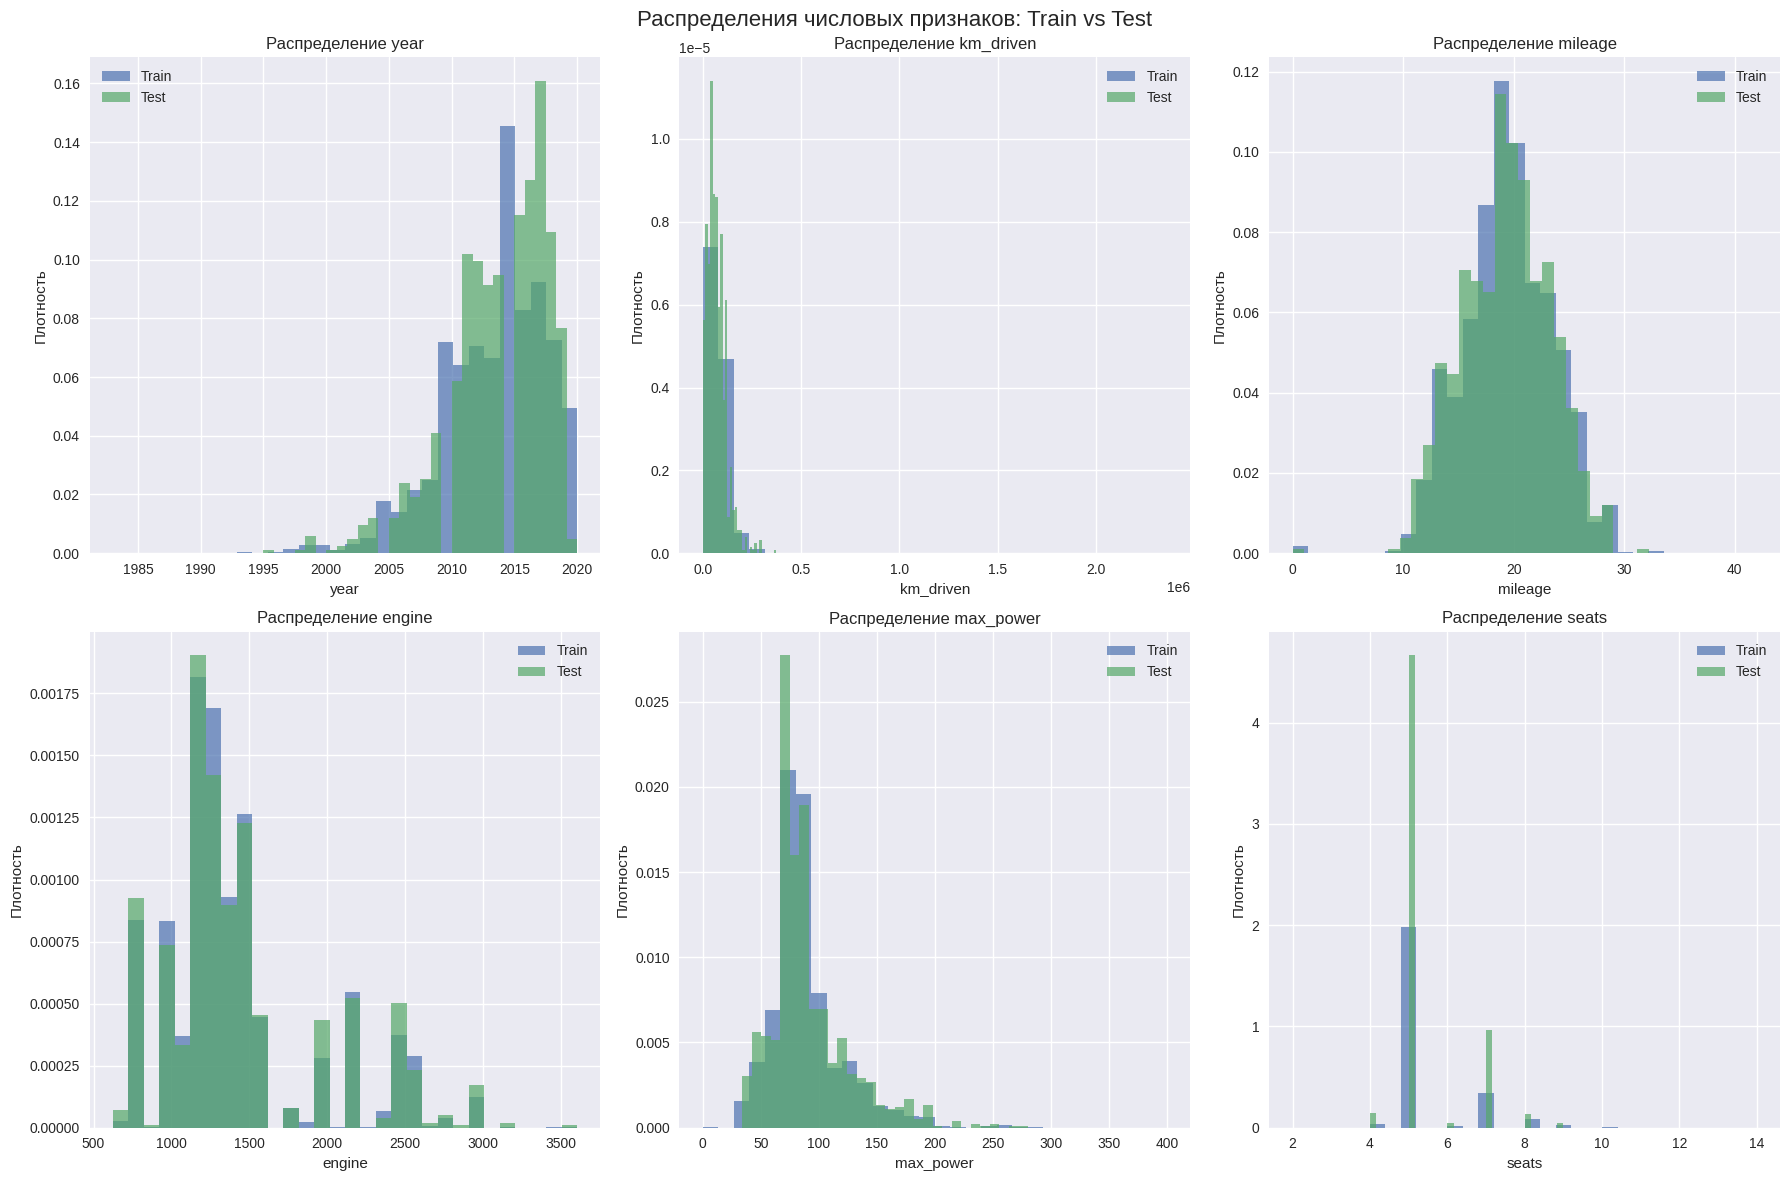

/tmp/ipython-input-3928734555.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[row, col_idx].boxplot(data_to_plot, labels=['Train', 'Test'])
/tmp/ipython-input-3928734555.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[row, col_idx].boxplot(data_to_plot, labels=['Train', 'Test'])
/tmp/ipython-input-3928734555.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[row, col_idx].boxplot(data_to_plot, labels=['Train', 'Test'])
/tmp/ipython-input-3928734555.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old

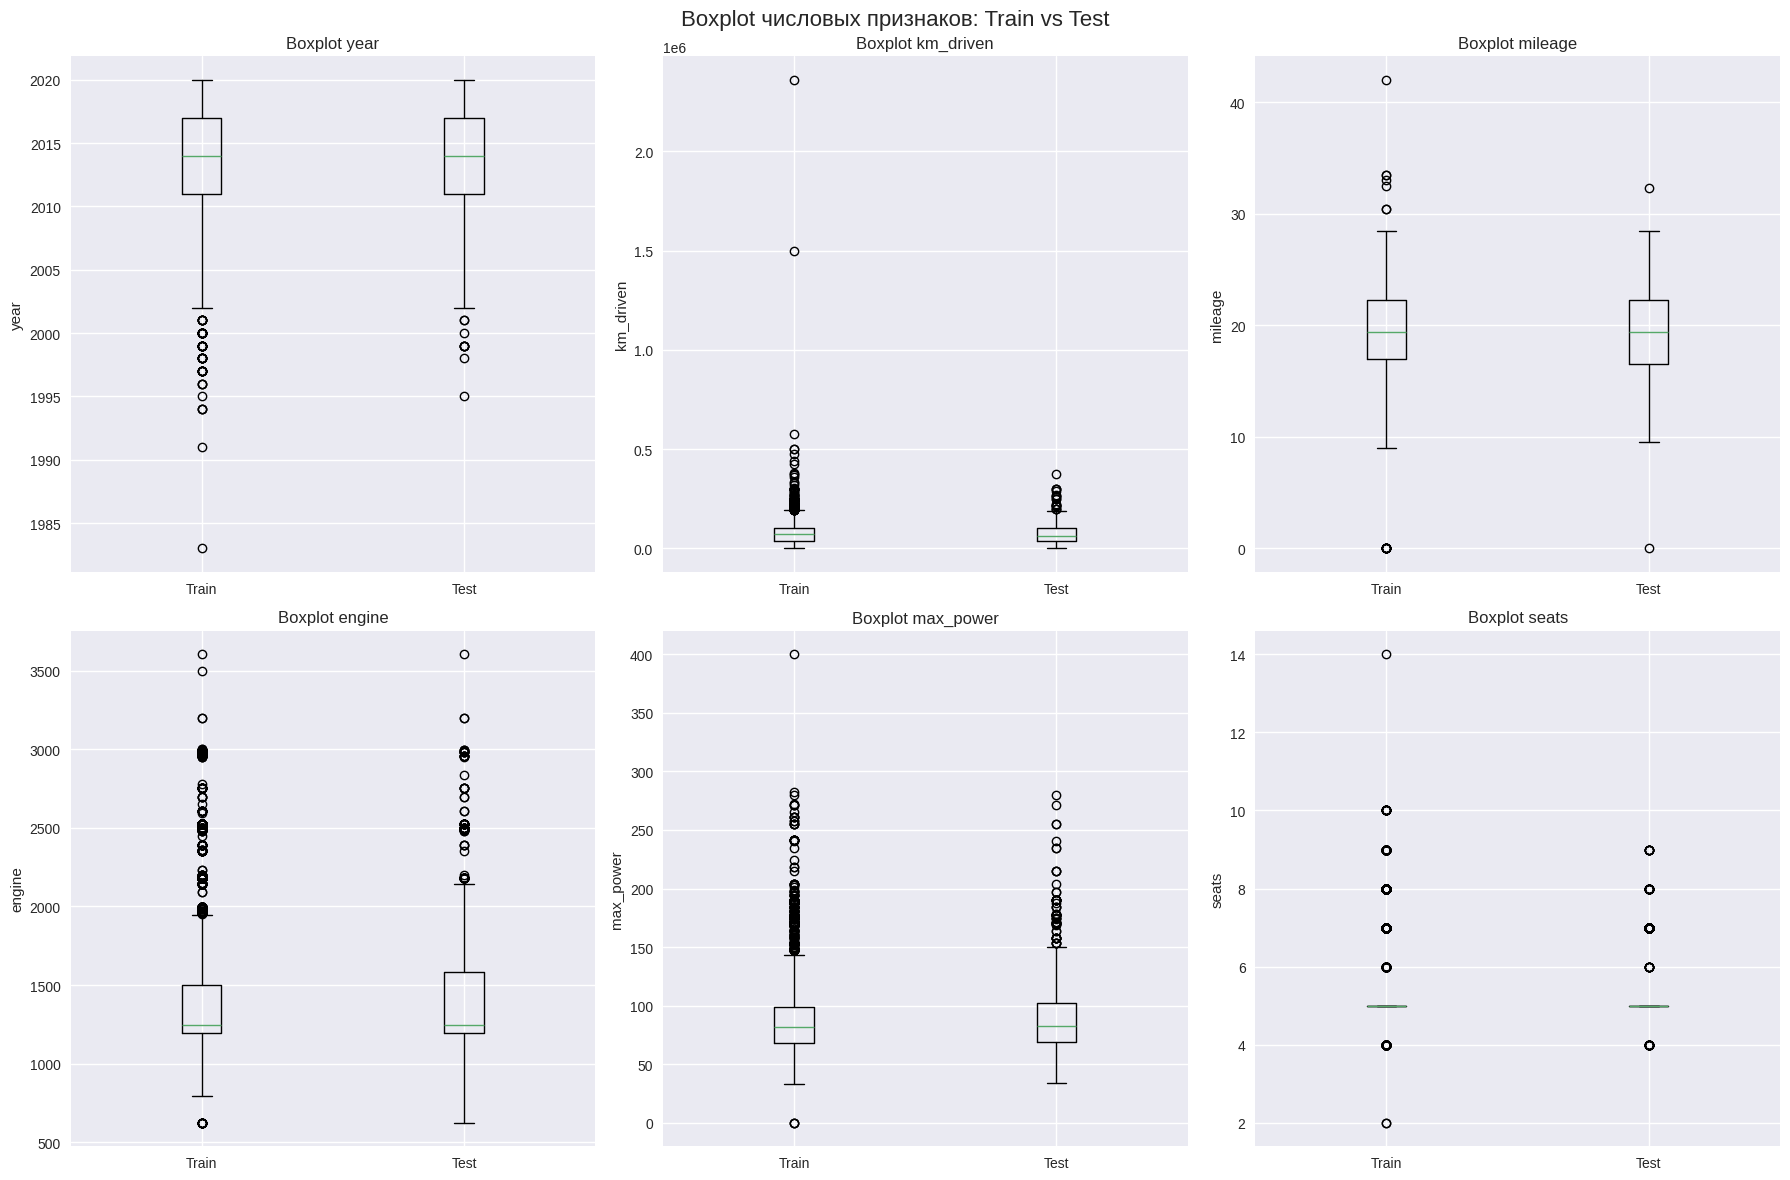

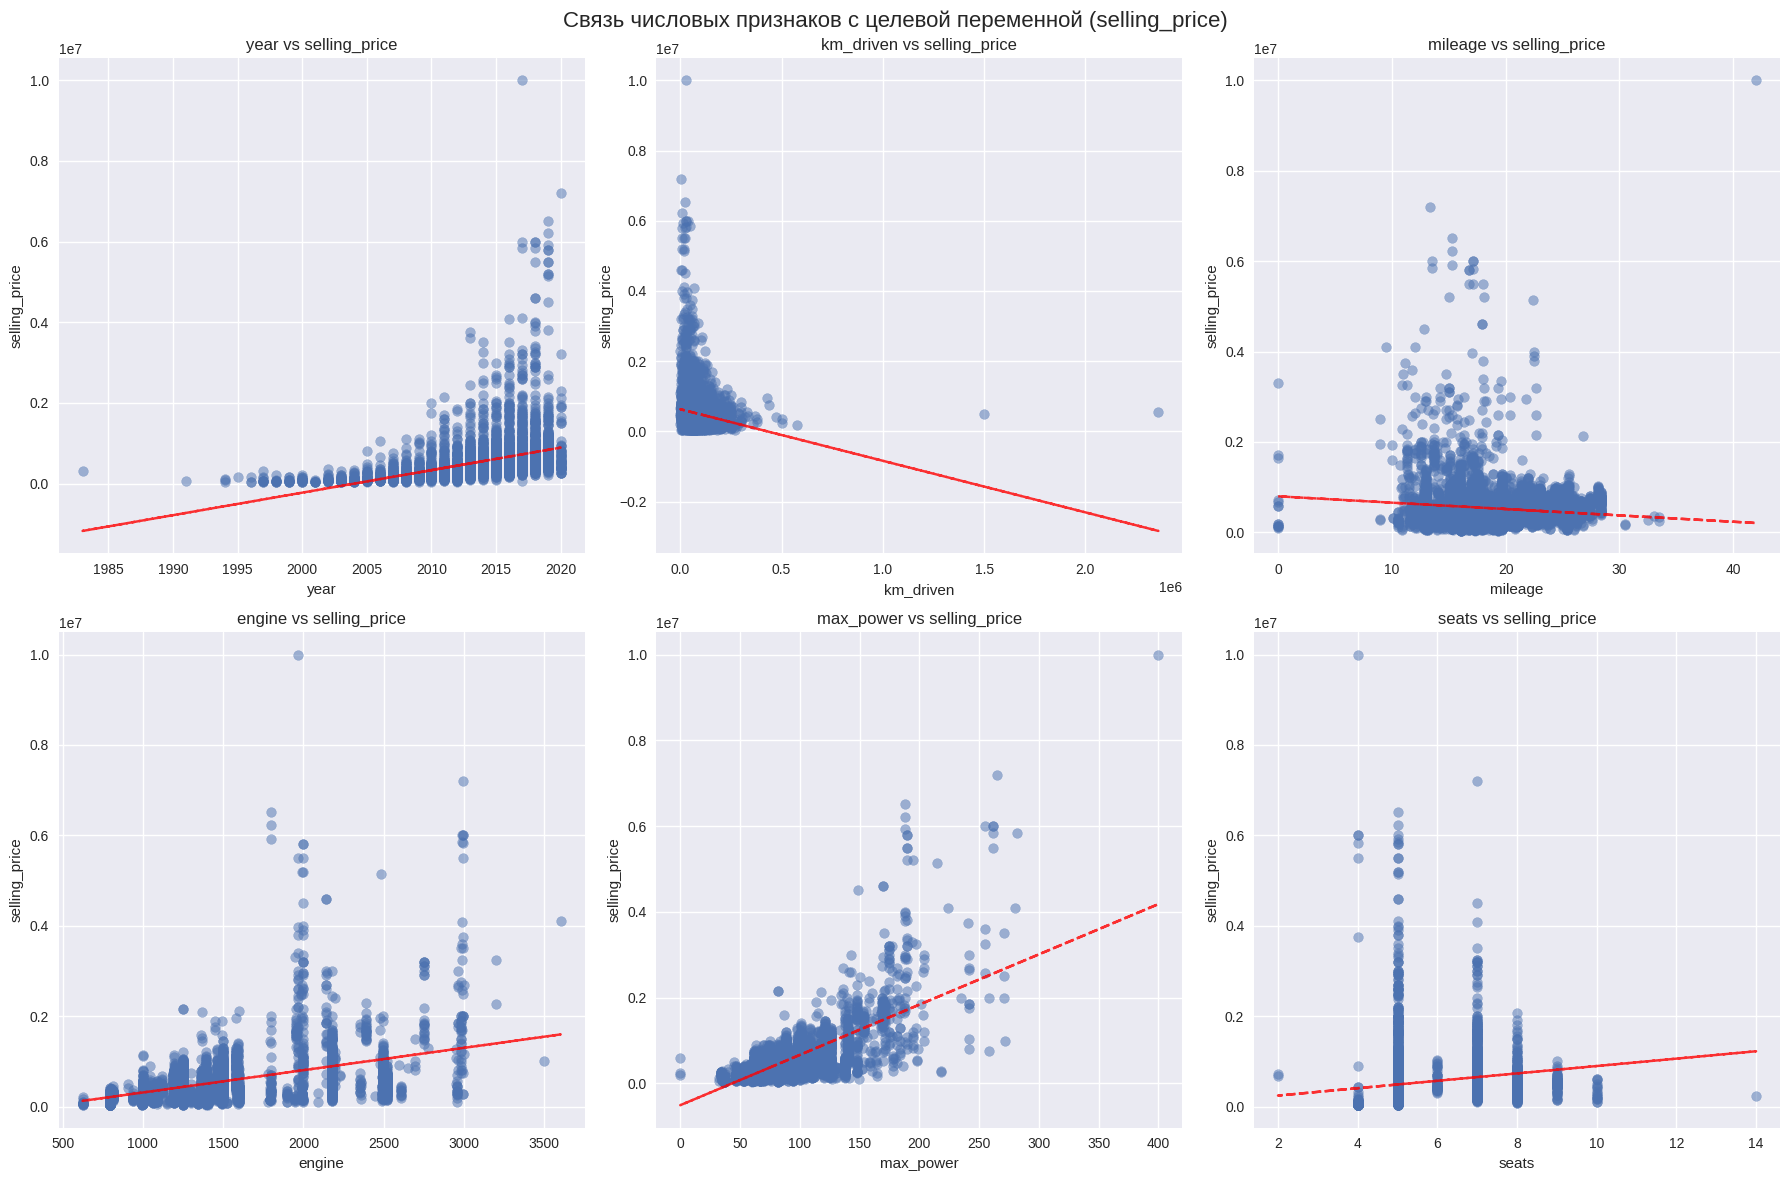

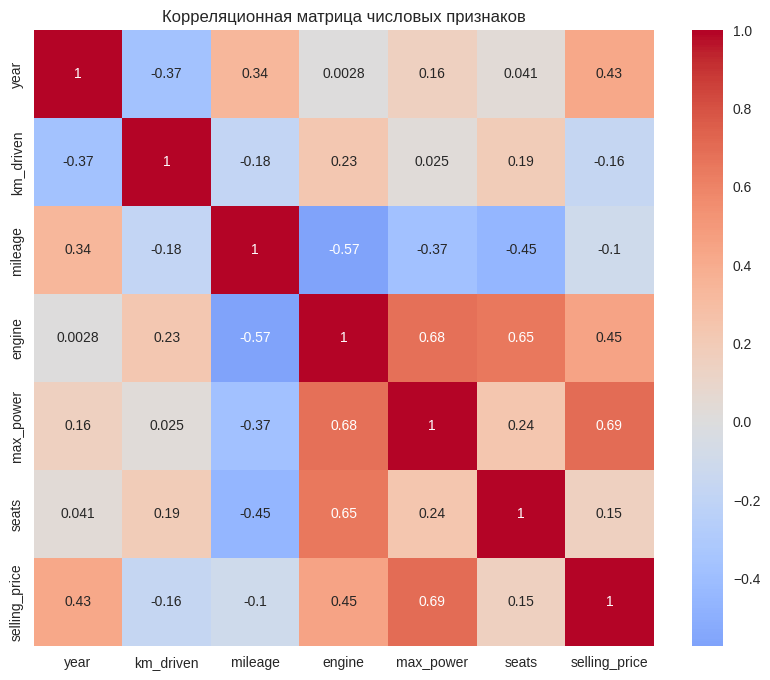

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')

numeric_cols = df_train.select_dtypes(include=[np.number]).columns.drop('selling_price')

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Распределения числовых признаков: Train vs Test', fontsize=16)

for i, col in enumerate(numeric_cols):
    row, col_idx = i // 3, i % 3
    axes[row, col_idx].hist(df_train[col], alpha=0.7, label='Train', bins=30, density=True)
    axes[row, col_idx].hist(df_test[col], alpha=0.7, label='Test', bins=30, density=True)
    axes[row, col_idx].set_title(f'Распределение {col}')
    axes[row, col_idx].legend()
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Плотность')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Boxplot числовых признаков: Train vs Test', fontsize=16)

for i, col in enumerate(numeric_cols):
    row, col_idx = i // 3, i % 3
    data_to_plot = [df_train[col].dropna(), df_test[col].dropna()]
    axes[row, col_idx].boxplot(data_to_plot, labels=['Train', 'Test'])
    axes[row, col_idx].set_title(f'Boxplot {col}')
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Связь числовых признаков с целевой переменной (selling_price)', fontsize=16)

for i, col in enumerate(numeric_cols):
    row, col_idx = i // 3, i % 3
    axes[row, col_idx].scatter(df_train[col], df_train['selling_price'], alpha=0.5)
    axes[row, col_idx].set_title(f'{col} vs selling_price')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('selling_price')
    valid_data = df_train[[col, 'selling_price']].dropna()
    if len(valid_data) > 1:
        try:
            z = np.polyfit(valid_data[col], valid_data['selling_price'], 1)
            p = np.poly1d(z)
            axes[row, col_idx].plot(valid_data[col], p(valid_data[col]), "r--", alpha=0.8)
        except:
            pass

plt.tight_layout()
plt.show()

categorical_cols = df_train.select_dtypes(include=['object']).columns


plt.figure(figsize=(10, 8))
correlation_matrix = df_train[numeric_cols.append(pd.Index(['selling_price']))].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

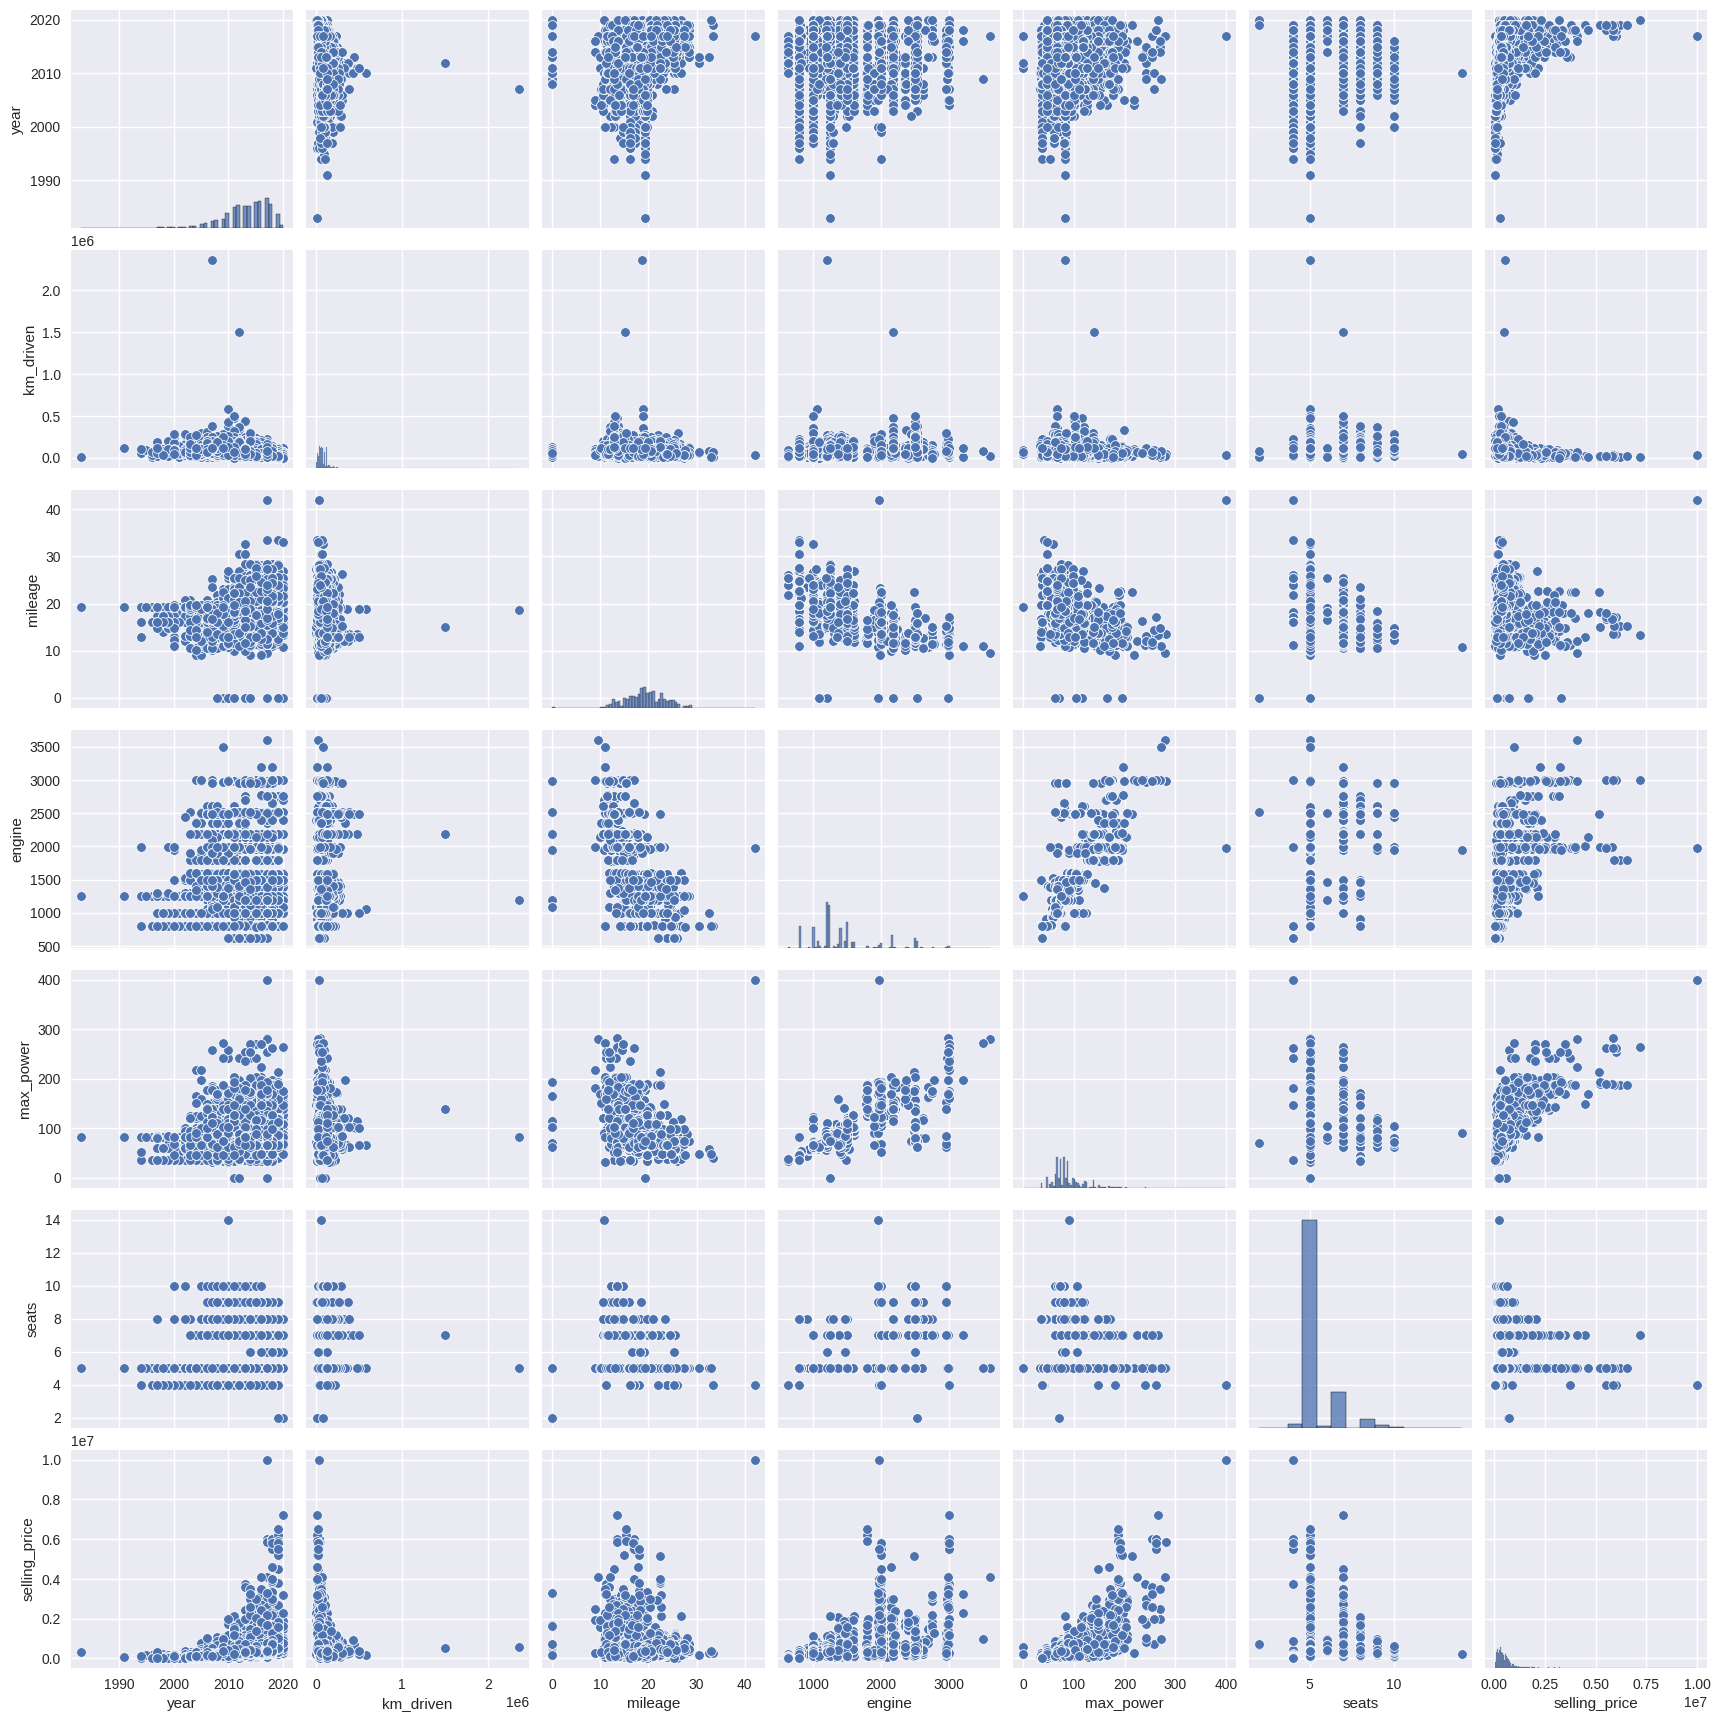

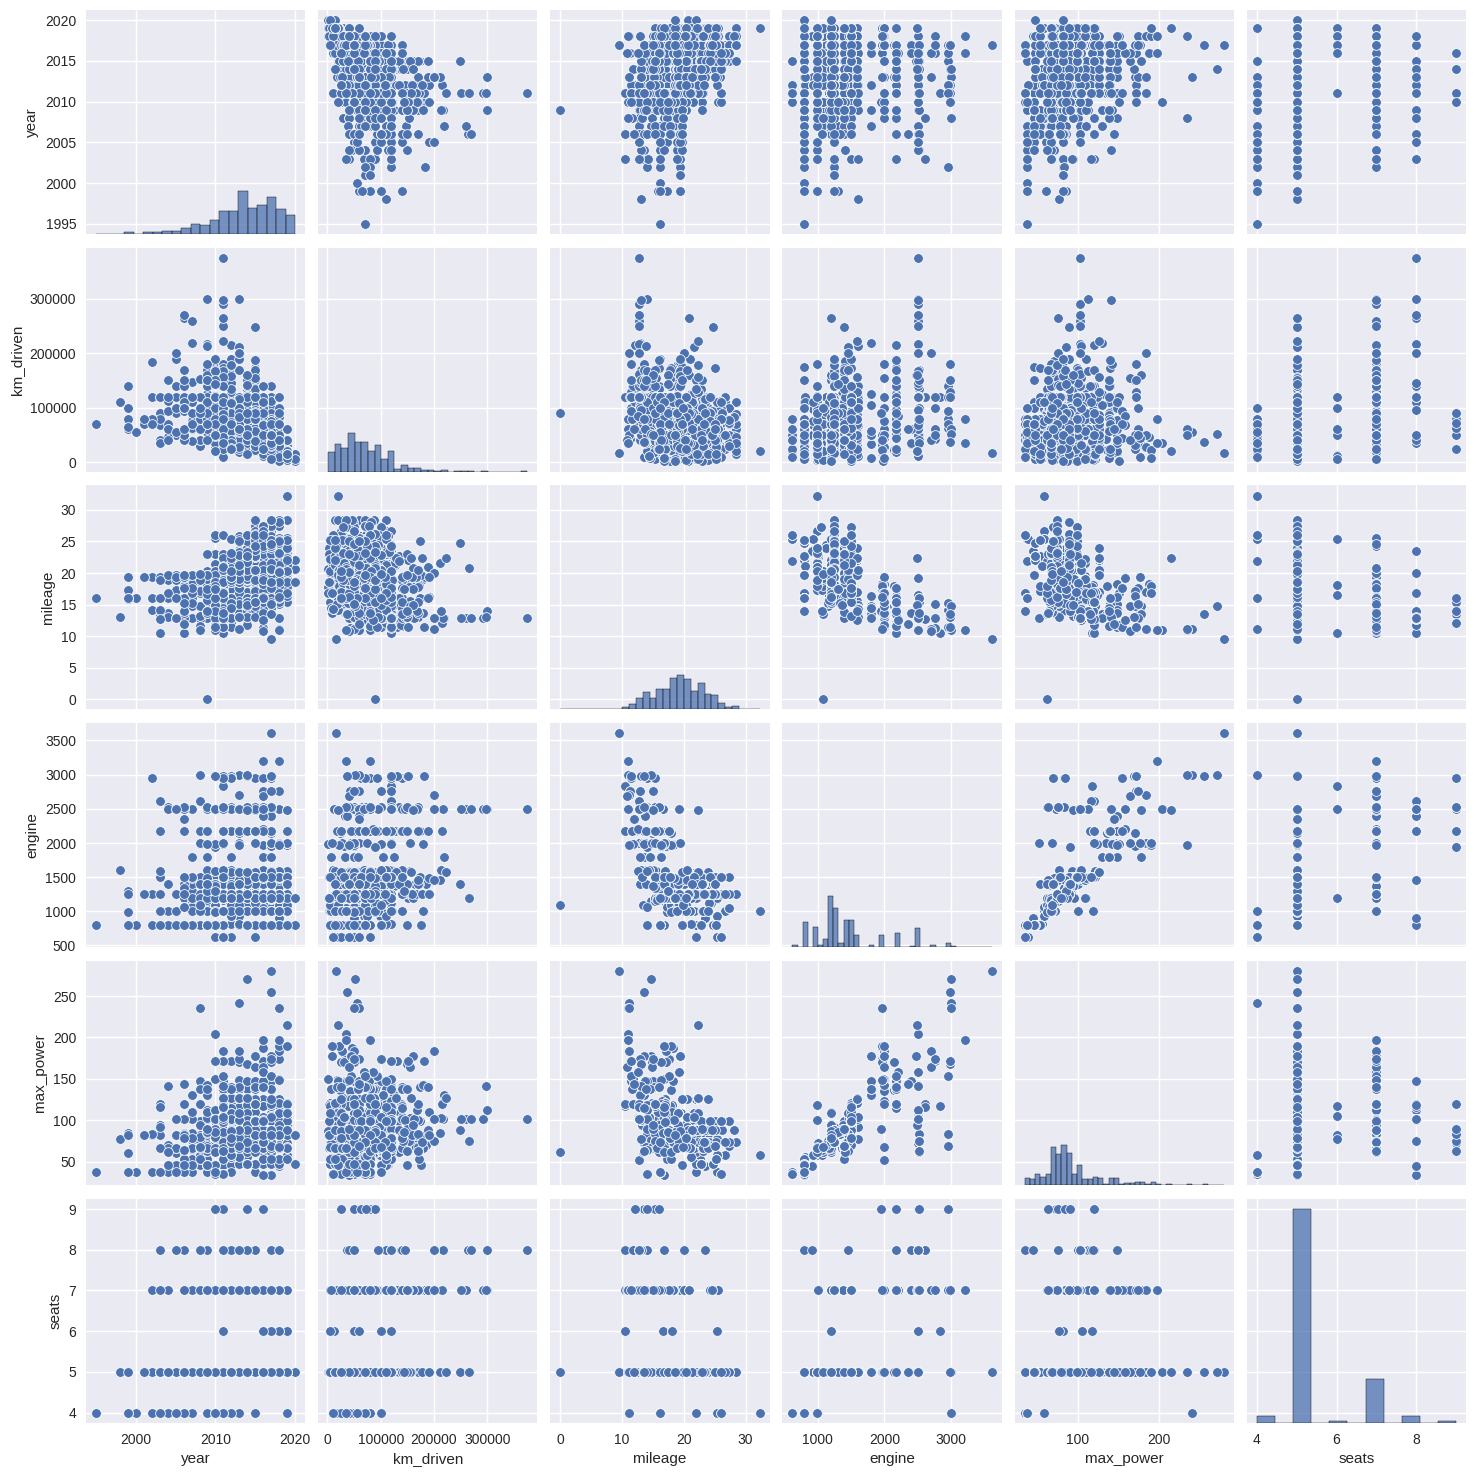

In [17]:
sns.pairplot(df_train[numeric_cols.append(pd.Index(['selling_price']))])
plt.show()

sns.pairplot(df_test[numeric_cols])
plt.show()

Можно наблюдать явную связь года выпуска и мощности двигателя с целевой переменной selling_price
Видны корреляции между техническими характеристиками: мощность двигателя связана с объемом двигателя, пробег связан с годом выпуска


Распределения признаков в train и test выборках визуально похожи, что свидетельствует о репрезентативном разделении данных

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


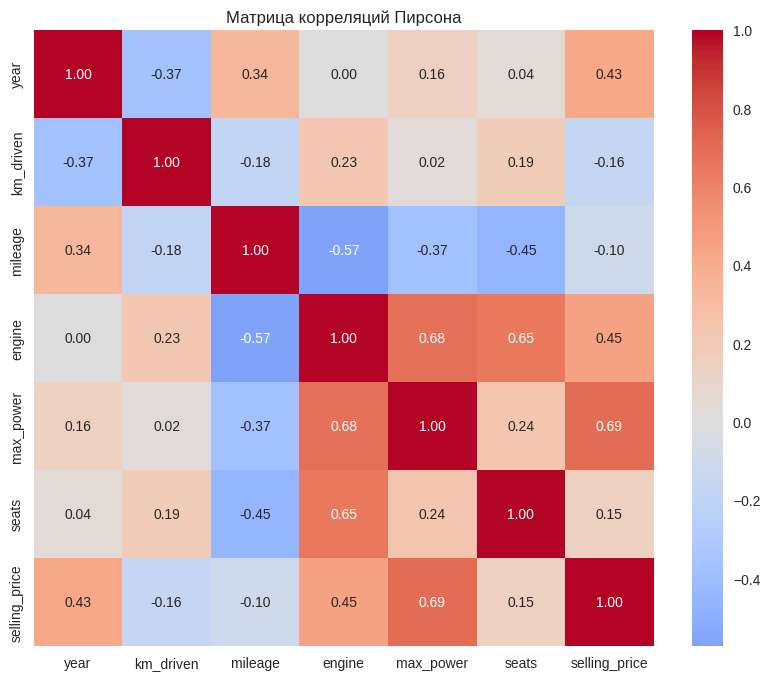

In [18]:
correlation_matrix = df_train[numeric_cols.append(pd.Index(['selling_price']))].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций Пирсона')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее скоррелированные признаки: years и engine (корреляция близка к 0)
Сильная положительная линейная зависимость: наблюдается между engine и max_power (корреляция ~0.68)
Про год и пробег: Да, это правильно. Наблюдается отрицательная корреляция между year и km_driven (-0.37), что означает: чем старше машина, тем больше у нее пробег.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

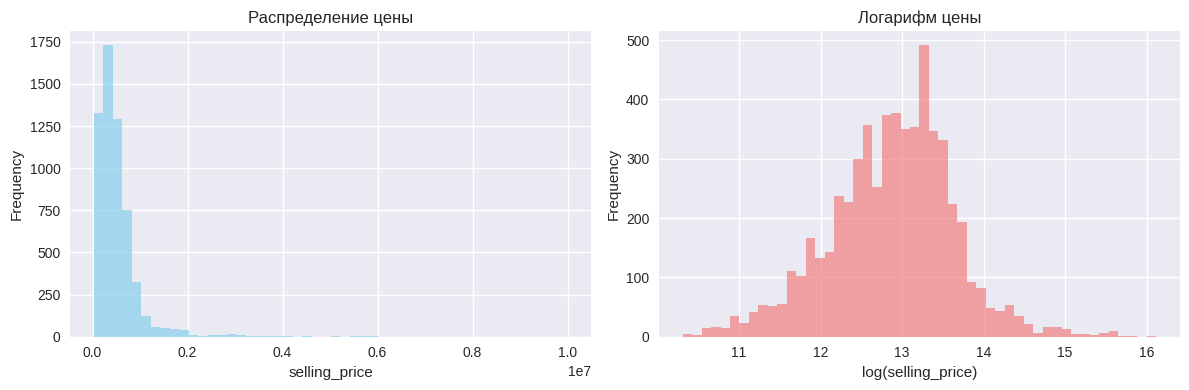

In [19]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_train['selling_price'], bins=50, alpha=0.7, color='skyblue')
plt.title('Распределение цены')
plt.xlabel('selling_price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(np.log1p(df_train['selling_price']), bins=50, alpha=0.7, color='lightcoral')
plt.title('Логарифм цены')
plt.xlabel('log(selling_price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()







Распределение цены показывает сильную левостороннюю асимметрию, что объясняет эффективность логарифмирования для линейных моделей

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [20]:
df_train_numeric = df_train.select_dtypes(include=[np.number]).copy()
df_test_numeric = df_test.select_dtypes(include=[np.number]).copy()

X_train = df_train_numeric.drop('selling_price', axis=1)
y_train = df_train_numeric['selling_price']
X_test = df_test_numeric.drop('selling_price', axis=1)
y_test = df_test_numeric['selling_price']

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Train R²: 0.5923
Test R²: 0.5941
Train MSE: 116874153930.03
Test MSE: 233298779730.45


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = model_scaled.predict(X_train_scaled)
y_test_pred_scaled = model_scaled.predict(X_test_scaled)

train_r2_scaled = r2_score(y_train, y_train_pred_scaled)
test_r2_scaled = r2_score(y_test, y_test_pred_scaled)
train_mse_scaled = MSE(y_train, y_train_pred_scaled)
test_mse_scaled = MSE(y_test, y_test_pred_scaled)

print(f"Train R²: {train_r2_scaled:.4f}")
print(f"Test R²: {test_r2_scaled:.4f}")
print(f"Train MSE: {train_mse_scaled:.2f}")
print(f"Test MSE: {test_mse_scaled:.2f}")

Train R²: 0.5923
Test R²: 0.5941
Train MSE: 116874153930.03
Test MSE: 233298779730.45


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [23]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': abs(model_scaled.coef_)
}).sort_values('coefficient', ascending=False)

print(feature_importance)

     feature    coefficient
4  max_power  322807.353259
0       year  152772.570846
3     engine   61178.494337
1  km_driven   44158.818520
2    mileage   28833.925778
5      seats   23209.132486


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
train_mse_lasso = MSE(y_train, y_train_pred_lasso)
test_mse_lasso = MSE(y_test, y_test_pred_lasso)

print(f"Lasso регрессия:")
print(f"Train R²: {train_r2_lasso:.4f}")
print(f"Test R²: {test_r2_lasso:.4f}")
print(f"Train MSE: {train_mse_lasso:.2f}")
print(f"Test MSE: {test_mse_lasso:.2f}")

lasso_coef = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lasso.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(lasso_coef)

zeroed_features = sum(lasso.coef_ == 0)
print(f"\nКоличество зануленных признаков: {zeroed_features}")

Lasso регрессия:
Train R²: 0.5923
Test R²: 0.5941
Train MSE: 116874153940.14
Test MSE: 233299450599.17
     feature    coefficient
4  max_power  322808.236919
0       year  152772.390214
3     engine   61173.662409
1  km_driven  -44157.689858
2    mileage   28832.043396
5      seats  -23206.255649

Количество зануленных признаков: 0


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='r2', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_lasso = grid_search.best_estimator_
print(f"{len(param_grid['alpha']) * 10}")

lasso_coef = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': best_lasso.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(lasso_coef)

zeroed_features = sum(best_lasso.coef_ == 0)
print(f"\nКоличество зануленных признаков: {zeroed_features}")

if zeroed_features > 0:
    print(lasso_coef[lasso_coef['coefficient'] == 0])

{'alpha': 1000}
0.568895116634703
70
     feature    coefficient
4  max_power  323666.834812
0       year  152556.386616
3     engine   56435.714938
1  km_driven  -43052.234680
2    mileage   27010.694999
5      seats  -20352.142469

Количество зануленных признаков: 0


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [26]:
from sklearn.linear_model import ElasticNet

param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic = ElasticNet()
grid_search_elastic = GridSearchCV(elastic, param_grid_elastic, cv=10, scoring='r2', return_train_score=True)
grid_search_elastic.fit(X_train_scaled, y_train)

print(grid_search_elastic.best_params_)
print(grid_search_elastic.best_score_)

total_models = len(param_grid_elastic['alpha']) * len(param_grid_elastic['l1_ratio']) * 10
print(f"\nКоличество обученных моделей: {total_models}")

best_elastic = grid_search_elastic.best_estimator_

elastic_coef = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': best_elastic.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(elastic_coef)

zeroed_features_elastic = sum(best_elastic.coef_ == 0)
print(f"{zeroed_features_elastic}")

{'alpha': 1, 'l1_ratio': 0.9}
0.5761314666976897

Количество обученных моделей: 250
     feature    coefficient
4  max_power  281553.752822
0       year  145991.707602
3     engine   79236.680549
1  km_driven  -46026.441304
5      seats  -24513.526123
2    mileage   22873.497246
0


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [27]:
df_train = df_train.drop('name', axis=1)
df_test = df_test.drop('name', axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [28]:
assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [29]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = df_train.select_dtypes(include=['object']).columns.tolist() + ['seats']
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(df_train[categorical_features])
X_test_encoded = encoder.transform(df_test[categorical_features])


feature_names = encoder.get_feature_names_out(categorical_features)


X_train_categorical = pd.DataFrame(X_train_encoded, columns=feature_names, index=df_train.index)
X_test_categorical = pd.DataFrame(X_test_encoded, columns=feature_names, index=df_test.index)

numerical_features = df_train.select_dtypes(include=[np.number]).columns.drop('selling_price')
X_train_full = pd.concat([df_train[numerical_features], X_train_categorical], axis=1)
X_test_full = pd.concat([df_test[numerical_features], X_test_categorical], axis=1)

y_train = df_train['selling_price']
y_test = df_test['selling_price']


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid_ridge = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

grid_search_ridge = GridSearchCV(pipeline, param_grid_ridge, cv=10, scoring='r2')
grid_search_ridge.fit(X_train_full, y_train)

print(grid_search_ridge.best_params_)
print(grid_search_ridge.best_score_)

best_ridge = grid_search_ridge.best_estimator_
y_test_pred_ridge = best_ridge.predict(X_test_full)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"R² на тестовых данных: {test_r2_ridge:.4f}")


{'ridge__alpha': 1000}
0.6209690612001925
R² на тестовых данных: 0.6030


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [31]:
def business_metric(y_true, y_pred):
    relative_error = np.abs((y_true - y_pred) / y_true)
    within_10_percent = np.sum(relative_error <= 0.1)
    return within_10_percent / len(y_true)


scaler_numeric = StandardScaler()
X_train_scaled_numeric = scaler_numeric.fit_transform(X_train)
X_test_scaled_numeric = scaler_numeric.transform(X_test)

scaler_full = StandardScaler()
X_train_scaled_full = scaler_full.fit_transform(X_train_full)
X_test_scaled_full = scaler_full.transform(X_test_full)


results = {}
y_pred_lr = model_scaled.predict(X_test_scaled_numeric)
results['Linear Regression'] = business_metric(y_test, y_pred_lr)
y_pred_lasso = best_lasso.predict(X_test_scaled_numeric)
results['Lasso'] = business_metric(y_test, y_pred_lasso)
y_pred_elastic = best_elastic.predict(X_test_scaled_numeric)
results['ElasticNet'] = business_metric(y_test, y_pred_elastic)
y_pred_ridge = best_ridge.predict(X_test_full)
results['Ridge'] = business_metric(y_test, y_pred_ridge)

for name, score in results.items():
    print(f"{name}: {score:.4f}")

best_model = max(results, key=results.get)
print(f"{best_model}  {results[best_model]:.4f}")

Linear Regression: 0.2270
Lasso: 0.2250
ElasticNet: 0.2410
Ridge: 0.2630
Ridge  0.2630


# Pickle

In [32]:
import os
import pickle

model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

In [42]:
model_path = os.path.join(model_dir, 'model.pkl')
feature_names_path = os.path.join(model_dir, 'feature_names.pkl')
feature_names = X_test.columns.tolist()
with open(model_path, 'wb') as f:
    pickle.dump((scaler, best_lasso, feature_names), f, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
df_test.to_csv('my.csv')

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.